# Lab Work 3: Classification of Image Data

## 1 Load the MNIST dataset
* get the data using code below
* assemble information on number of images, size of images, distribution among different classes

In [2]:
from sklearn.datasets import fetch_openml
from math import sqrt

In [3]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True)

/home/chris/WS2324/bda2/Praktikum/env/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
X.shape

(70000, 784)

In [5]:
# Data about the dataset
num_images = X.shape[0]
image_size = X.shape[1]
print("Number of images:", X.shape[0])
print("Image size:", X.shape[1])

Number of images: 70000
Image size: 784


In [6]:
import numpy as np
# Distribution among different classes (labels)
class_distribution = np.bincount(y.astype(int))
for digit, count in enumerate(class_distribution):
    print(f"{digit} has {count} images.")

0 has 6903 images.
1 has 7877 images.
2 has 6990 images.
3 has 7141 images.
4 has 6824 images.
5 has 6313 images.
6 has 6876 images.
7 has 7293 images.
8 has 6825 images.
9 has 6958 images.


## 2 Visualize the input data
* Display at least two images for each class in the dataset
* Show the class identity per image

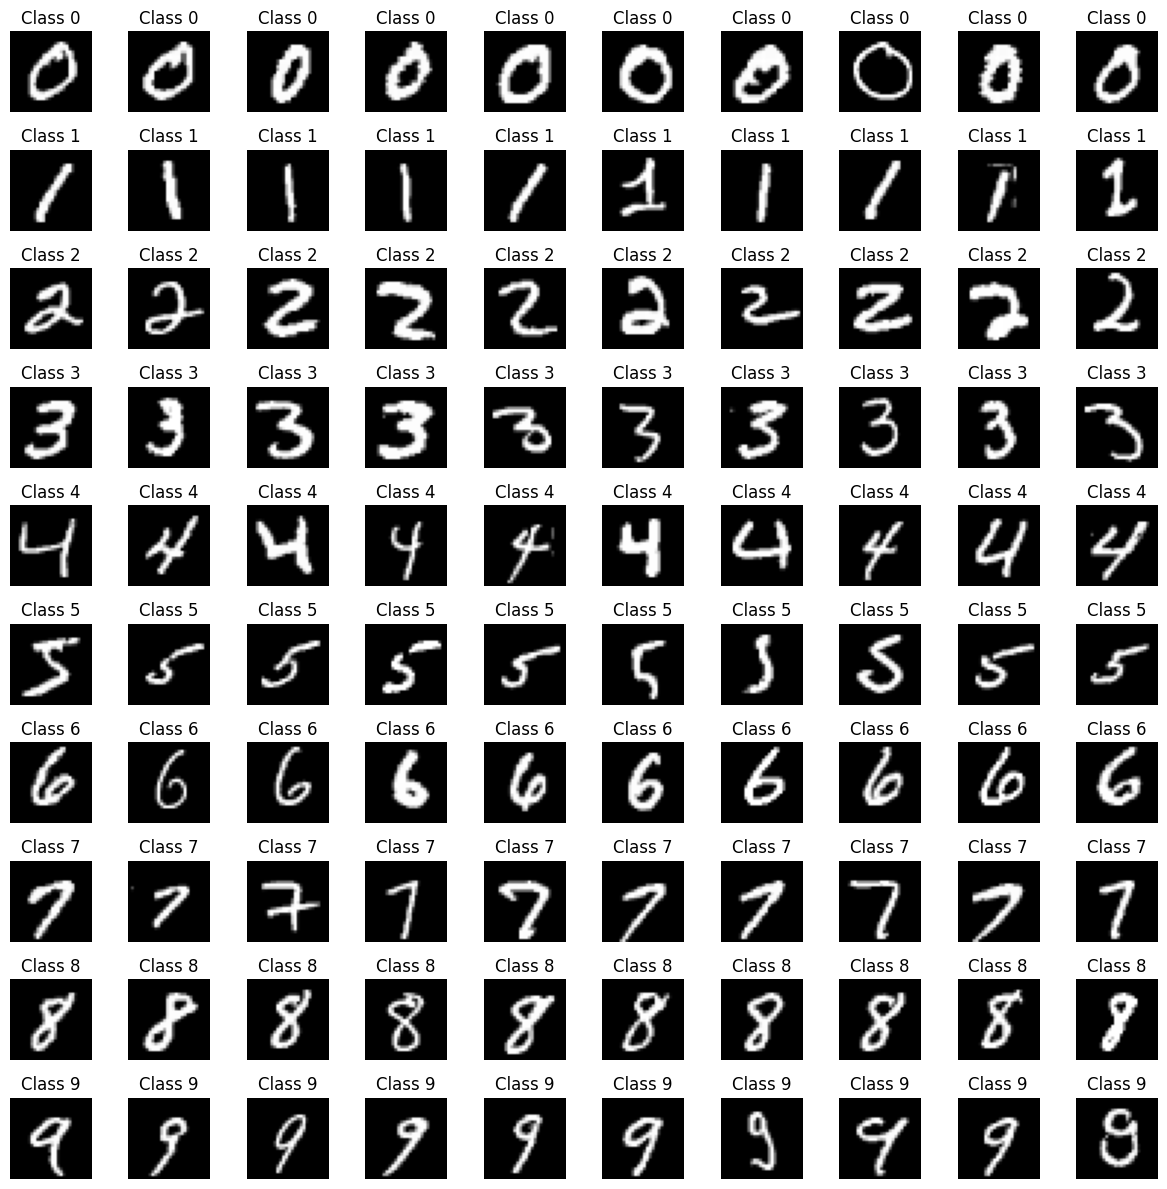

In [7]:
import matplotlib.pyplot as plt

X = np.array(X)
y = np.array(y, dtype=int)
images_per_class = 10

fig, axes = plt.subplots(10, images_per_class, figsize=(12, 12))
for digit in range(10):
    # indices of images with the same label
    indices = np.where(y == digit)[0][:images_per_class]
    for i, index in enumerate(indices):
        image = X[index].reshape(28, 28)
        
        axes[digit, i].imshow(image, cmap='gray')
        axes[digit, i].axis('off')
        axes[digit, i].set_title(f"Class {digit}")

plt.tight_layout()
plt.show()

## 3 Train a k-NN Classifier and Check the Performance

### 3.1 Import the required modules for classifier and performance measurement

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

### 3.2 Train the classifier using 3-fold cross_validation 
* create a training and testing set
* train the classifer with cross_validate, check the documentation: **What does cross_validate return?**

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn_classifier = KNeighborsClassifier(n_neighbors=10)

In [11]:
scoring_metrics = ['accuracy'] # for all models

cv_results = cross_validate(knn_classifier, X_train, y_train, cv=3, scoring=scoring_metrics)

for metric in scoring_metrics:
    print(f"Mean {metric} during cross-validation: {np.mean(cv_results['test_' + metric]):.2f}")

Mean accuracy during cross-validation: 0.96


`cross_validate` returns a dictionary (cv_results) containing various information about the cross-validation, such as training and test scores.

The cv_results dictionary contains information about each fold's *test* scores for each specified metric. In the example, we calculate and display the mean accuracy across folds. 

### NEW:
Array of scores of the estimator for each run of the cross validation.

A dict of arrays containing the score/time arrays for each scorer is returned.

### 3.3 Use the best classifier from the previous run and check with your test set 
* Generate a classification report
* Generate a confusion matrix

In [12]:
from sklearn.metrics import classification_report, confusion_matrix

In [13]:
# Fit the classifier on the entire training set
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)

In [59]:
report = classification_report(y_test, y_pred, output_dict=True)
# printed without output_dict=True to be more readable
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1343
           1       0.94      0.99      0.97      1600
           2       0.97      0.95      0.96      1380
           3       0.96      0.96      0.96      1433
           4       0.98      0.97      0.97      1295
           5       0.96      0.96      0.96      1273
           6       0.98      0.99      0.98      1396
           7       0.96      0.97      0.96      1503
           8       0.99      0.92      0.95      1357
           9       0.95      0.96      0.95      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



In [15]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[1329    1    5    0    1    2    3    1    1    0]
 [   0 1590    1    1    1    1    0    4    0    2]
 [  11   25 1310    1    2    3    5   16    3    4]
 [   0    6   12 1370    0   11    2   14    8   10]
 [   3    8    1    0 1254    0    1    3    1   24]
 [   4    7    0   16    1 1228   11    0    3    3]
 [   6    2    1    0    3    6 1378    0    0    0]
 [   1   25    5    0    3    0    0 1454    0   15]
 [   4   16    7   27    3   21    4   11 1250   14]
 [   5    7    2   10   16    1    1   18    2 1358]]


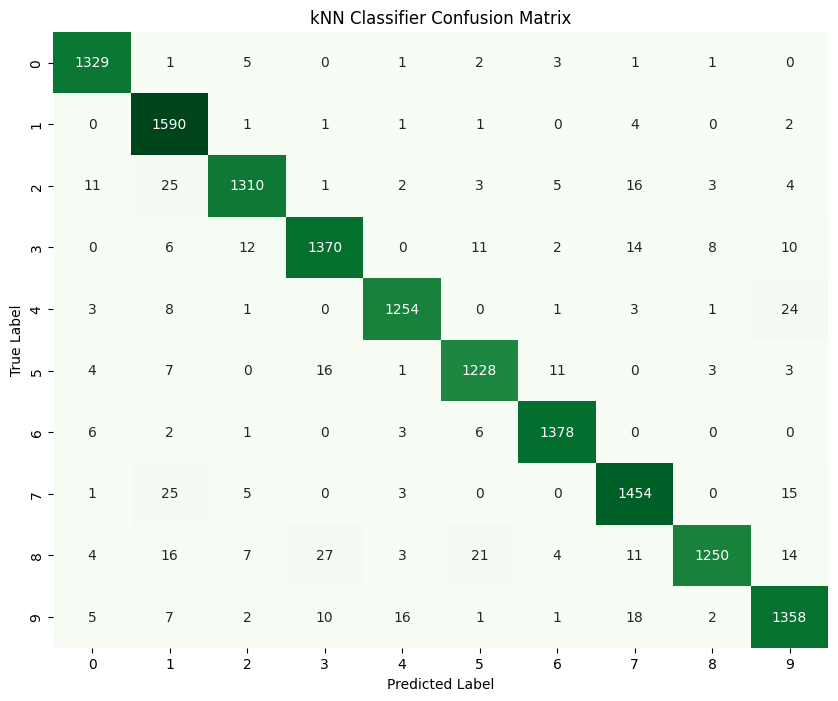

In [91]:
# Plot the confusion matrix using Seaborn
import seaborn as sns
import pandas as pd
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.title("kNN Classifier Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


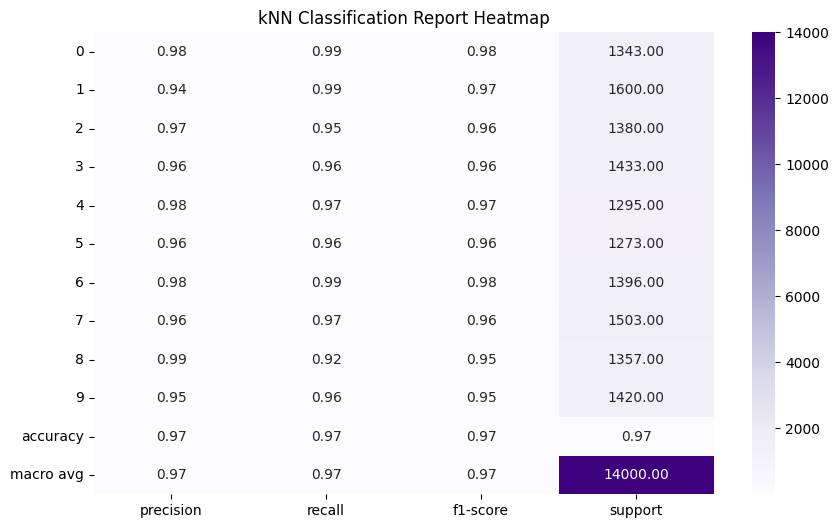

In [92]:
# Convert classification report to DataFrame
report_df = pd.DataFrame(report).transpose()

# Plot classification report as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].astype(float), annot=True, cmap="Purples", fmt=".2f")
plt.title("kNN Classification Report Heatmap")
plt.show()

# 4 Train a Decision Tree Classifier and Check the Performance

In [62]:
from sklearn.tree import DecisionTreeClassifier

X = np.array(X)
y = np.array(y, dtype=int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4.1 Train the classifier using 3-fold cross_validation

In [68]:
dt_classifier = DecisionTreeClassifier(random_state=42)
cross_val_scores = cross_validate(dt_classifier, X_train, y_train, cv=3, scoring=scoring_metrics)

dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### 4.2 Check the performance with your test set

In [73]:
y_pred_dt = dt_classifier.predict(X_test)

dt_report = classification_report(y_test, y_pred_dt, output_dict=True)
print("Classification Report (Decision Tree):\n", classification_report(y_test, y_pred_dt))

conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("\nConfusion Matrix (Decision Tree):\n", conf_matrix_dt)

Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.92      0.92      0.92      1343
           1       0.94      0.95      0.95      1600
           2       0.87      0.83      0.85      1380
           3       0.83      0.84      0.83      1433
           4       0.84      0.87      0.85      1295
           5       0.83      0.82      0.82      1273
           6       0.90      0.90      0.90      1396
           7       0.91      0.90      0.91      1503
           8       0.80      0.80      0.80      1357
           9       0.84      0.84      0.84      1420

    accuracy                           0.87     14000
   macro avg       0.87      0.87      0.87     14000
weighted avg       0.87      0.87      0.87     14000


Confusion Matrix (Decision Tree):
 [[1239    4   16    8    7   17   23    3   19    7]
 [   1 1520    7   12   13    4    6   11   22    4]
 [  21   20 1144   45   19   14   25   26   48   18]
 [  11

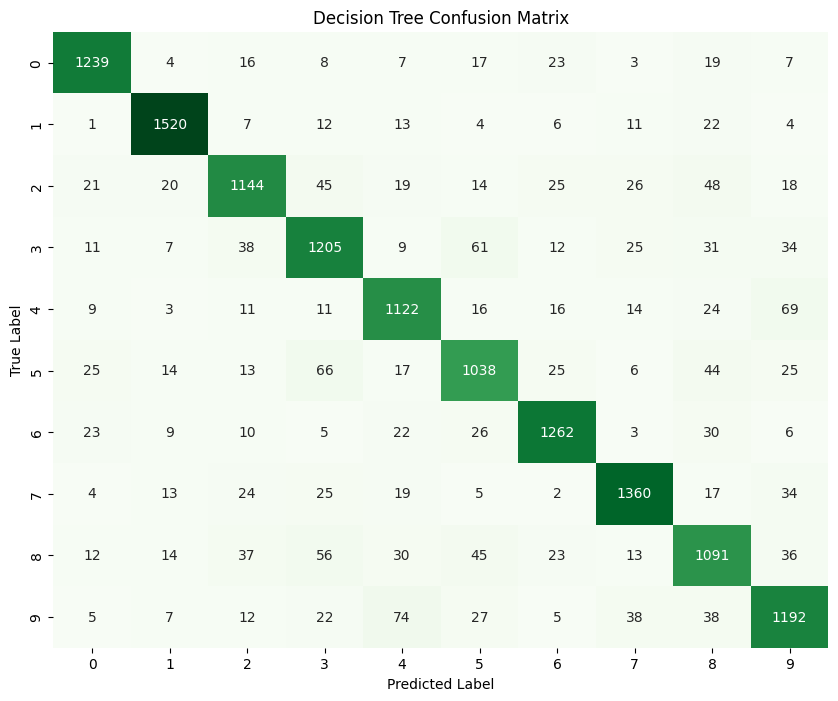

In [94]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

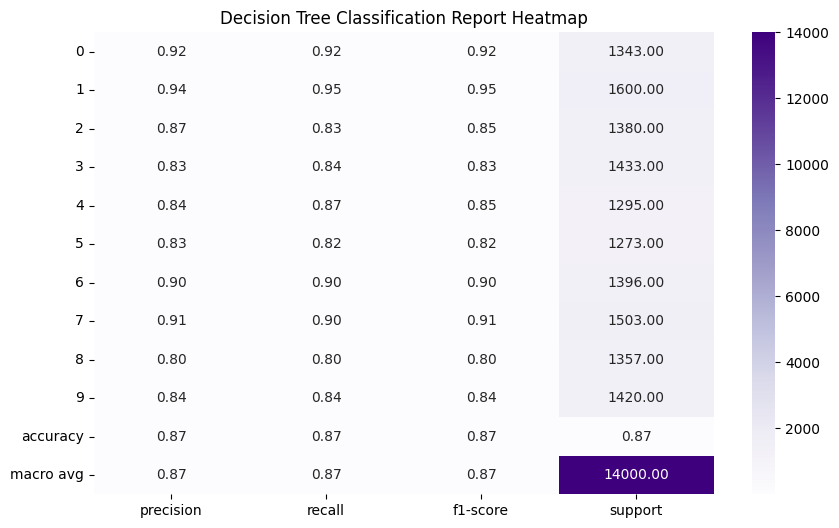

In [95]:
report_df = pd.DataFrame(dt_report).transpose()

# Plot classification report as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].astype(float), annot=True, cmap="Purples", fmt=".2f")
plt.title("Decision Tree Classification Report Heatmap")
plt.show()

## 5 Improve with a Random Forest Classifier

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
cross_val_scores = cross_validate(rf_classifier, X_train, y_train, cv=3, scoring=scoring_metrics)
rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)

In [82]:
# Generate a classification report
classification_rep_rf = classification_report(y_test, y_pred_rf, output_dict=True)
print("Classification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))

# Generate a confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix (Random Forest):\n", conf_matrix_rf)

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1343
           1       0.98      0.98      0.98      1600
           2       0.95      0.97      0.96      1380
           3       0.96      0.95      0.96      1433
           4       0.96      0.97      0.97      1295
           5       0.97      0.96      0.97      1273
           6       0.98      0.98      0.98      1396
           7       0.97      0.97      0.97      1503
           8       0.96      0.95      0.96      1357
           9       0.96      0.95      0.95      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000


Confusion Matrix (Random Forest):
 [[1325    0    4    0    1    1    3    1    6    2]
 [   0 1573    6    8    2    0    0    6    3    2]
 [   4    5 1334    4    5    1    9    8    8    2]
 [   1

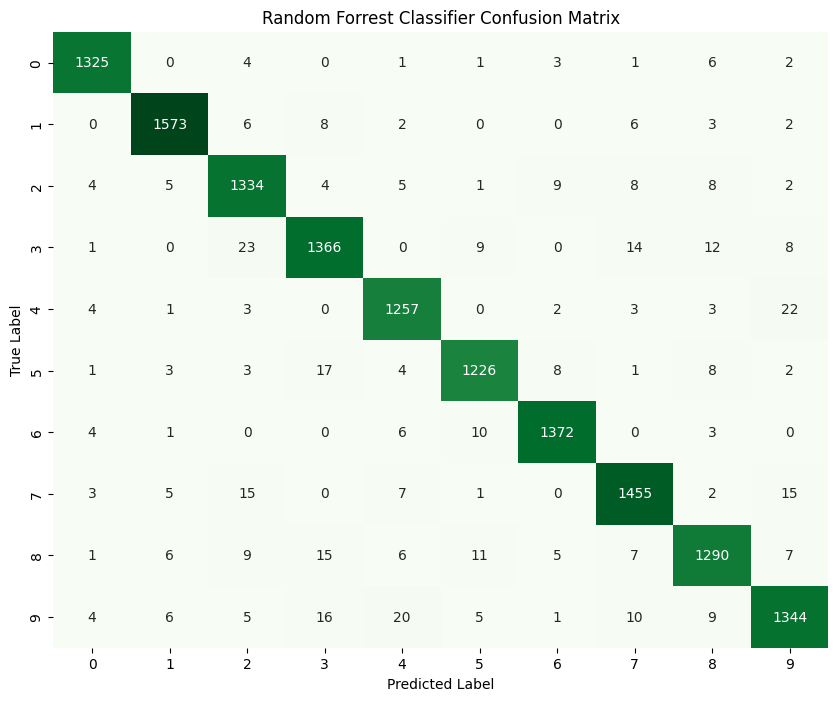

In [97]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.title("Random Forrest Classifier Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

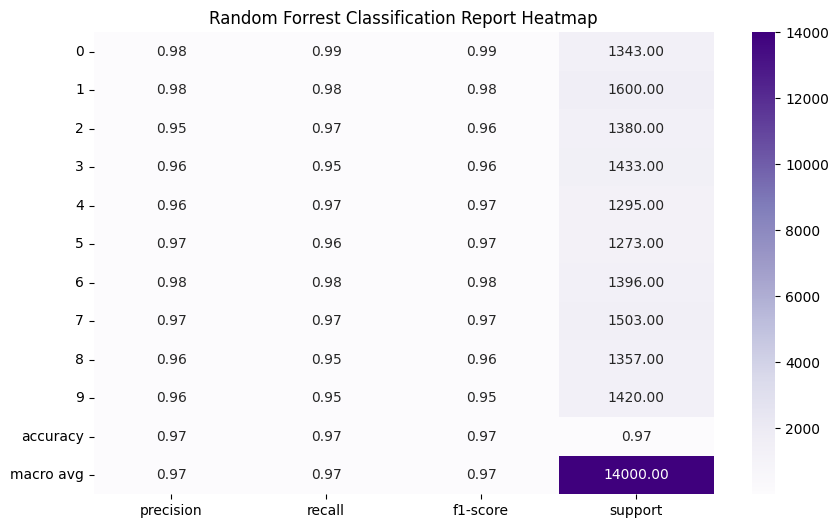

In [98]:
report_df = pd.DataFrame(classification_rep_rf).transpose()

# Plot classification report as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].astype(float), annot=True, cmap="Purples", fmt=".2f")
plt.title("Random Forrest Classification Report Heatmap")
plt.show()

## 6 Further improvement: Gradient Boosting (Random Forests)

In [85]:
from sklearn.ensemble import GradientBoostingClassifier

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [87]:
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
cross_val_scores = cross_validate(gb_classifier, X_train, y_train, cv=3, scoring=scoring_metrics)
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [88]:
y_pred_gb = gb_classifier.predict(X_test)

In [89]:
classification_rep_gb = classification_report(y_test, y_pred_gb, output_dict=True)
print("Classification Report (Gradient Boosting):\n", classification_report(y_test, y_pred_gb))

conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
print("\nConfusion Matrix (Gradient Boosting):\n", conf_matrix_gb)

Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      1715
           1       0.97      0.98      0.97      1971
           2       0.93      0.93      0.93      1786
           3       0.94      0.91      0.92      1763
           4       0.93      0.94      0.94      1676
           5       0.93      0.92      0.93      1593
           6       0.96      0.96      0.96      1710
           7       0.95      0.93      0.94      1837
           8       0.91      0.93      0.92      1713
           9       0.90      0.91      0.91      1736

    accuracy                           0.94     17500
   macro avg       0.94      0.94      0.94     17500
weighted avg       0.94      0.94      0.94     17500


Confusion Matrix (Gradient Boosting):
 [[1677    0    2    3    4    7    8    2   12    0]
 [   0 1935   11    5    3    3    2    5    5    2]
 [   4    9 1669   19   17    3   11   15   35    4

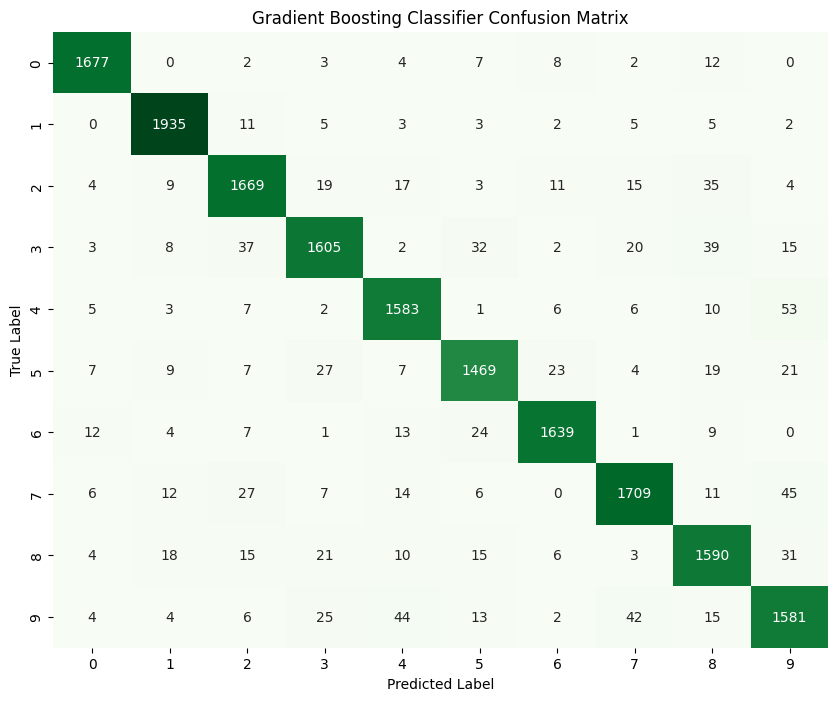

In [99]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_gb, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.title("Gradient Boosting Classifier Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

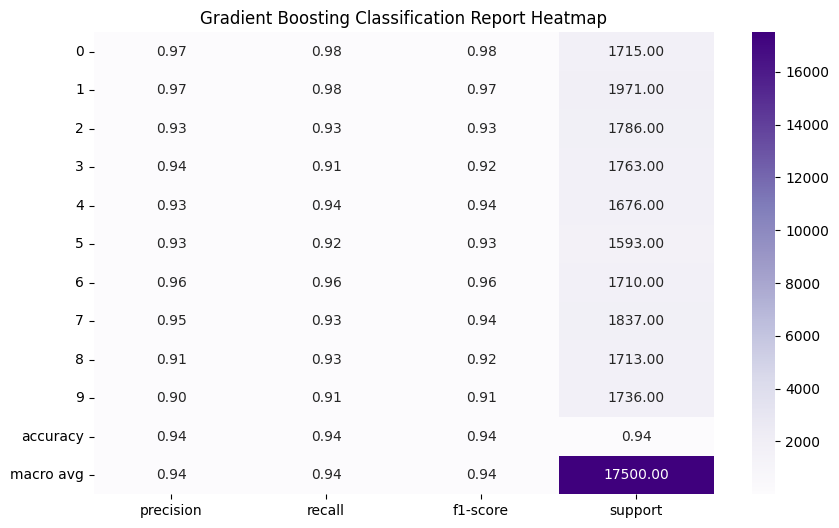

In [100]:
report_df = pd.DataFrame(classification_rep_gb).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].astype(float), annot=True, cmap="Purples", fmt=".2f")
plt.title("Gradient Boosting Classification Report Heatmap")
plt.show()